<a href="https://colab.research.google.com/github/refecher/machine-learning/blob/main/Determinants_of_Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


## Upgrade Plotly

In [46]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##  Import Statements


In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [48]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [49]:
df_data = pd.read_csv('NLSY97_subset.csv')
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


## Understand the Dataset

Take a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

In [50]:
pd.set_option('display.max_rows', None)

In [51]:
df_names = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')
df_names

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
5,ETHHISP,D,Hispanic
6,ETHWHITE,D,"Non-black, non-hispanic"
7,NaN,NaN,NaN
8,AGE,C,Age in 2011
9,BYEAR,C,Year of birth


In [52]:
pd.reset_option('^display.', silent=True)

# Preliminary Data Exploration

* The data contains 2000 rows and 96 columns.

In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

Drop columns with more than 20% of missing data.

In [54]:
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? True


In [55]:
duplicated_data = df_data[df_data.duplicated()]
duplicated_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1000,4693,14.50,12,7.250000,0,1,1981,30,20.0,40700.0,...,1,0,0,0,1,0,1,0,0,0
1004,4827,38.48,16,8.500000,0,1,1981,30,34.0,27700.0,...,0,1,0,0,0,0,1,0,0,0
1006,4176,4.29,16,2.038461,0,1,1980,31,23.0,2500.0,...,1,0,0,1,0,0,1,0,0,0
1012,3256,10.00,12,8.019231,0,1,1984,27,21.0,43000.0,...,0,0,1,0,0,0,1,0,0,0
1015,4600,52.00,17,9.076923,0,1,1980,31,28.0,48900.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2740,14.00,12,12.442310,1,0,1980,31,27.0,81800.0,...,1,0,1,0,0,0,1,0,0,0
1996,1119,14.83,18,1.923077,1,0,1983,28,28.0,50000.0,...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.673077,1,0,1984,27,29.0,77610.0,...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.711538,1,0,1982,29,23.0,69300.0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
df_data = df_data.drop_duplicates()
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.711538,0,1,1984,27,24.0,64000.0,...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.711538,0,1,1982,29,32.0,6000.0,...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.942307,0,1,1981,30,23.0,88252.0,...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.538462,0,1,1983,28,30.0,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.942308,0,1,1984,27,23.0,44188.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.826920,1,0,1982,29,29.0,73100.0,...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.365385,1,0,1982,29,23.0,66300.0,...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.288462,1,0,1984,27,25.0,76300.0,...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.115385,1,0,1984,27,22.0,NaN,...,1,0,0,1,0,0,1,0,0,0


In [59]:
for col in df_data.columns:
  pct_missing = np.mean(df_data[col].isnull())*100
  if pct_missing > 0:
    print('{} - {:.2f}%'.format(col, pct_missing))

AGEMBTH - 2.29%
HHINC97 - 18.96%
POVRAT97 - 19.10%
PRMONM - 42.77%
PRMONF - 53.06%
PRMSTYUN - 26.03%
PRMSTYPE - 26.03%
PRMSTYAN - 26.03%
PRMSTYAE - 26.03%
PRFSTYUN - 39.21%
PRFSTYPE - 39.21%
PRFSTYAN - 39.21%
PRFSTYAE - 39.21%
SFR - 19.50%
SMR - 3.83%
JOBS - 2.56%


In [63]:
df_data.drop(df_data.columns[32:42], axis=1, inplace=True)
df_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.711538,0,1,1984,27,24.0,64000.0,...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.711538,0,1,1982,29,32.0,6000.0,...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.942307,0,1,1981,30,23.0,88252.0,...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.538462,0,1,1983,28,30.0,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.942308,0,1,1984,27,23.0,44188.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.826920,1,0,1982,29,29.0,73100.0,...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.365385,1,0,1982,29,23.0,66300.0,...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.288462,1,0,1984,27,25.0,76300.0,...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.115385,1,0,1984,27,22.0,NaN,...,1,0,0,1,0,0,1,0,0,0


In [89]:
df_data['HHINC97'] = df_data['HHINC97'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Descriptive Statistics

In [64]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1453.000000,1205.000000,...,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.0
mean,3547.129792,18.806980,14.556826,6.700171,0.488231,0.511769,1982.066577,28.933423,26.324845,58310.671369,...,0.775387,0.158036,0.269670,0.342972,0.229321,0.045730,0.538668,0.413584,0.002017,0.0
std,2009.838175,11.996112,2.765504,2.855655,0.500030,0.500030,1.381577,1.381577,5.078900,43868.046469,...,0.427030,0.364898,0.443938,0.474862,0.420537,0.208968,0.498670,0.492641,0.044886,0.0
min,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,1980.000000,27.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1888.000000,11.410000,12.000000,4.653846,0.000000,0.000000,1981.000000,28.000000,23.000000,32000.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3474.000000,15.750000,15.000000,6.634615,0.000000,1.000000,1982.000000,29.000000,26.000000,50500.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,5160.500000,22.600000,16.000000,8.711538,1.000000,1.000000,1983.000000,30.000000,30.000000,72000.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0
max,8980.000000,132.890000,20.000000,14.730770,1.000000,1.000000,1984.000000,31.000000,45.000000,246474.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## Visualise the Features

#### Years of Schooling (S)

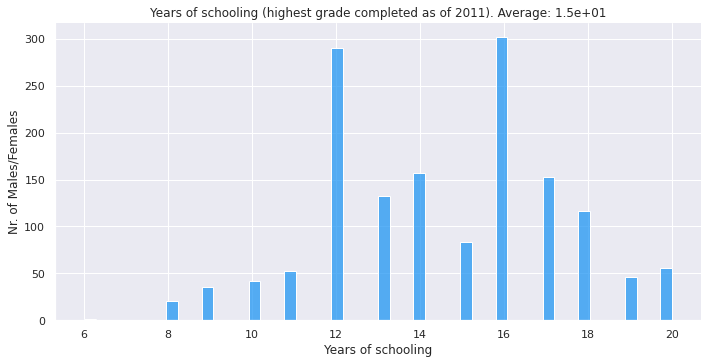

In [71]:
sns.displot(df_data['S'], 
            bins=50, 
            aspect=2,
            color='#2196f3')


plt.title(f'Years of schooling (highest grade completed as of 2011). Average: {(df_data.S.mean()):.2}')
plt.xlabel('Years of schooling')
plt.ylabel('Nr. of Males/Females')

plt.show()

#### Total Out-of-School Work Experience (EXP)

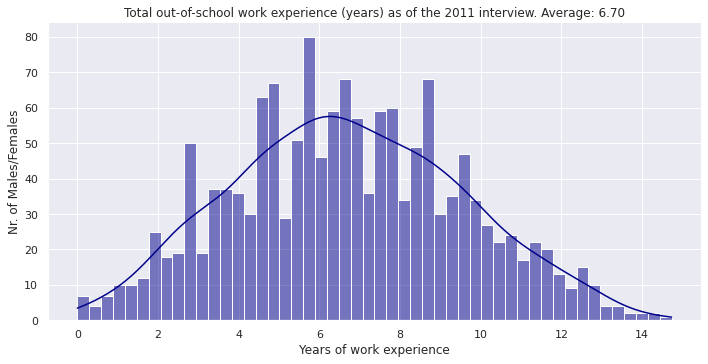

In [66]:
sns.displot(df_data['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Total out-of-school work experience (years) as of the 2011 interview. Average: {(df_data.EXP.mean()):.2f}')
plt.xlabel('Years of work experience')
plt.ylabel('Nr. of Males/Females')

plt.show()

### Total Earnings per Hour (EARNINGS)

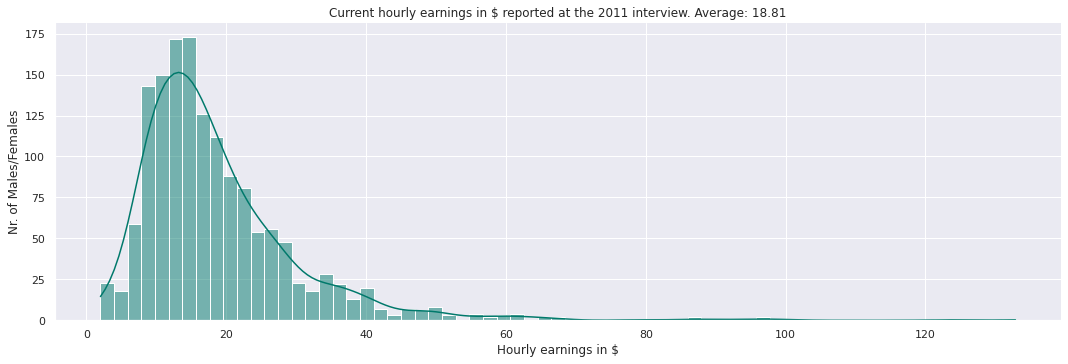

In [67]:
sns.displot(df_data.EARNINGS, 
            aspect=3,
            kde=True, 
            color='#00796b')

plt.title(f'Current hourly earnings in $ reported at the 2011 interview. Average: {df_data.EARNINGS.mean():.2f}')
plt.xlabel('Hourly earnings in $')
plt.ylabel('Nr. of Males/Females')

plt.show()

### Number of Jobs as of 2011 (JOBS)

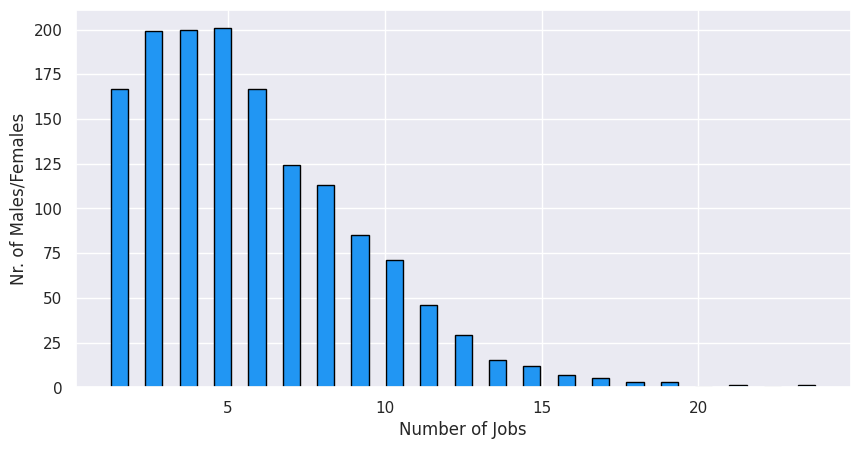

In [70]:
plt.figure(figsize=(10, 5), dpi=100)

plt.hist(df_data.JOBS, 
         bins=21, 
         ec='black', 
         color='#2196f3', 
         rwidth=0.5)

plt.xlabel('Number of Jobs')
plt.ylabel('Nr. of Males/Females')
plt.show()

### Educational Qualification
---------------------------

    :Understand what each variable means:
      1. EDUCHSD     High School Diploma
      2. EDUCBA      Bachelor's Degree
      4. EDUCAA      Associate's Degree (two-year college)
      5. EDUCMAST    Master's Degree
      6. EDUCGED     General Educational Development Certificate (HSD equivalence)
      7. EDUCDO      High School Dropout
      8. EDUCPROF    Professional Degree
      9. EDUCPHD     Doctorate

In [73]:
# index_education = ['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']
index_education = df_data.columns[24:32].values

count_education = [df_data[educ].value_counts()[1] for educ in index_education]

bar = px.bar(x=index_education,
             y=count_education,
             color=count_education,
             color_continuous_scale=px.colors.sequential.Burg,
             title='Highest Educational Qualification',
             width=900, 
             height=600)

bar.update_layout(xaxis_title='Education Level',
                  yaxis_title='Number of People',
                  coloraxis_showscale=False,
                  xaxis={'categoryorder':'total descending'})
bar.show()

# Correlation Between Variables

## Heat Map
---------------------
For visualization purposes, I separated the heatmap in 2 with different data to try to find a relationship between the Earnings and the other variables in the dataset

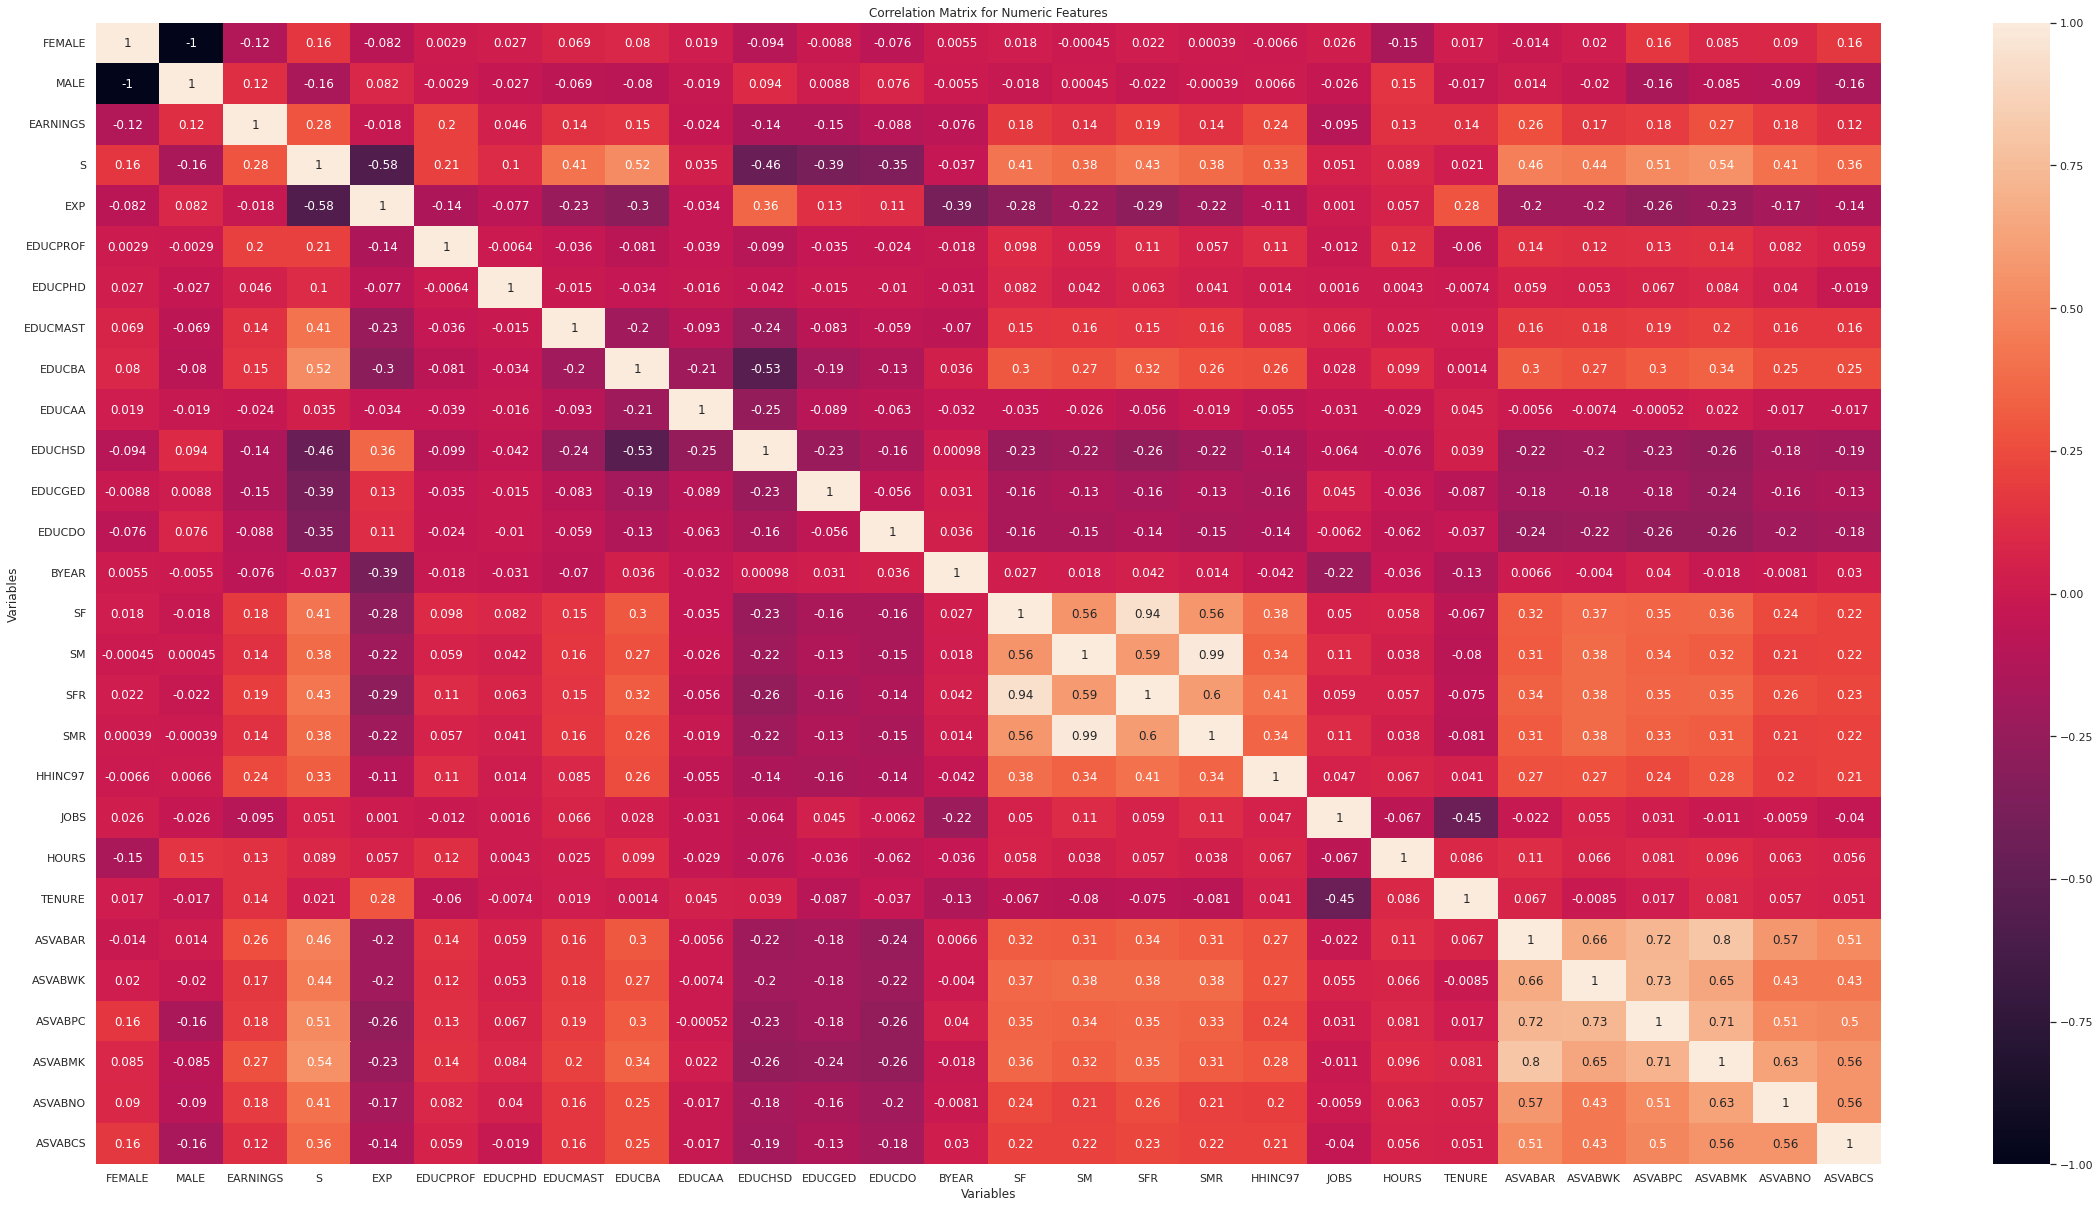

In [74]:
df_data_split = df_data[['FEMALE', 'MALE', 'EARNINGS', 'S', 'EXP', 'EDUCPROF', \
                         'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', \
                         'EDUCGED', 'EDUCDO', 'BYEAR', 'SF', 'SM', 'SFR', \
                         'SMR', 'HHINC97', 'JOBS', 'HOURS', 'TENURE', \
                         'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', \
                         'ASVABNO', 'ASVABCS']]

correlation_matrix = df_data_split.corr(method='pearson')
sns.set(rc = {'figure.figsize':(40,21)})
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

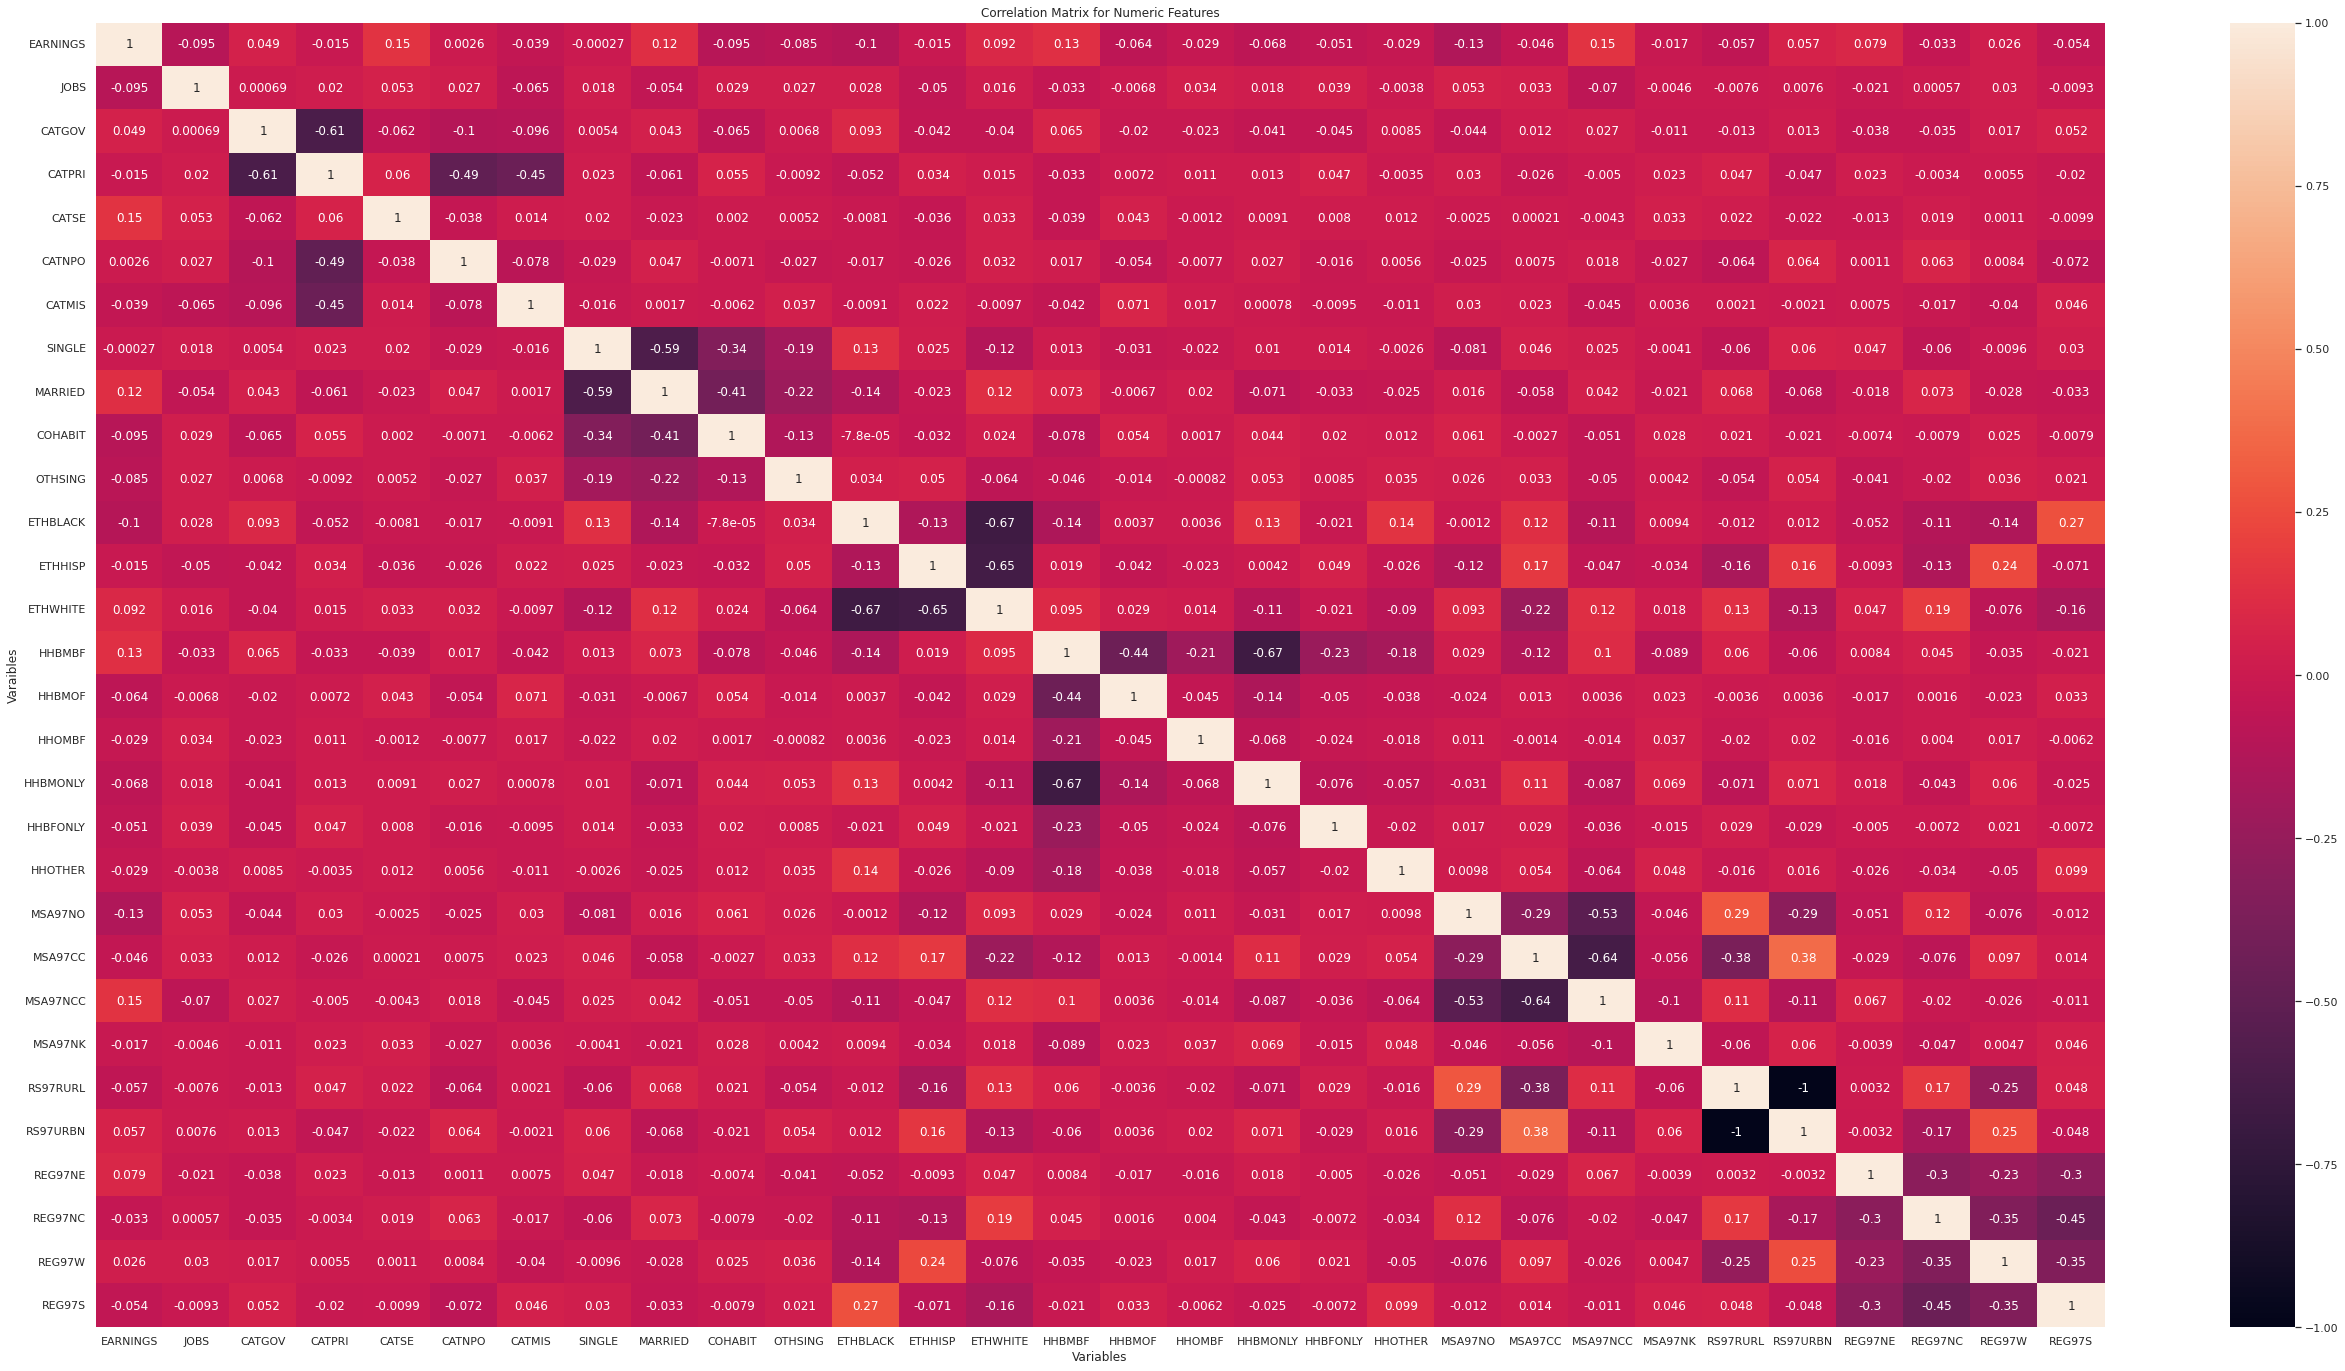

In [100]:
df_data_split_2 = df_data[['EARNINGS', 'JOBS', 'CATGOV', 'CATPRI', 'CATSE', \
                           'CATNPO', 'CATMIS', 'SINGLE', 'MARRIED', 'COHABIT', \
                           'OTHSING', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', \
                           'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', \
                           'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97CC', \
                           'MSA97NCC', 'MSA97NK', 'RS97RURL', 'RS97URBN', \
                           'REG97NE', 'REG97NC', 'REG97W', 'REG97S']]

correlation_matrix = df_data_split_2.corr(method='pearson')
sns.set(rc = {'figure.figsize':(45,24)})
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Variables')
plt.ylabel('Varaibles')
plt.show()

## Pair Plot Graph

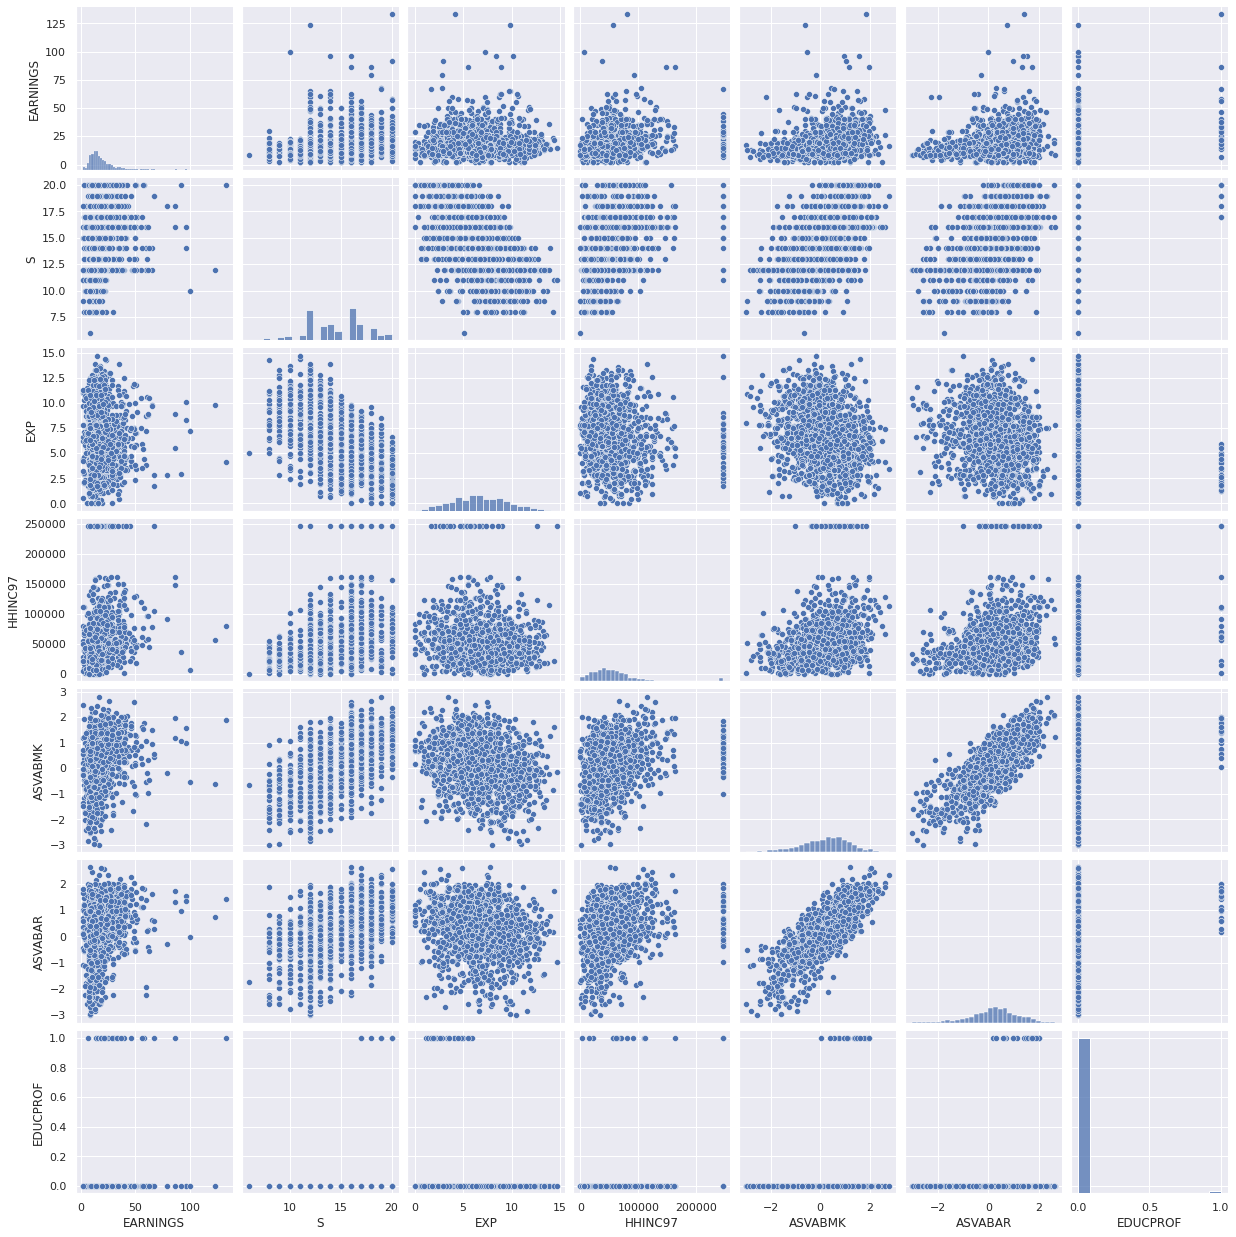

In [80]:
data_pp = df_data[['EARNINGS', 'S', 'EXP', 'HHINC97', 'ASVABMK', 'ASVABAR', 'EDUCPROF']]
sns.pairplot(data_pp)

plt.show()

## Reg Plot

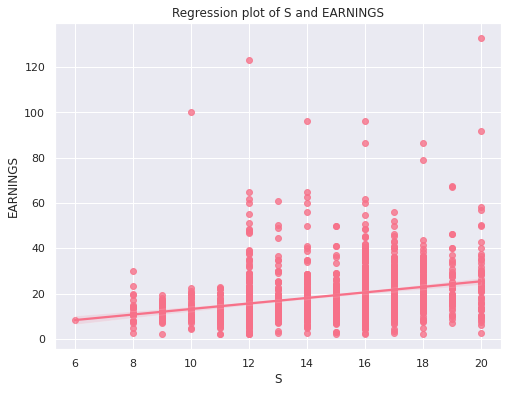

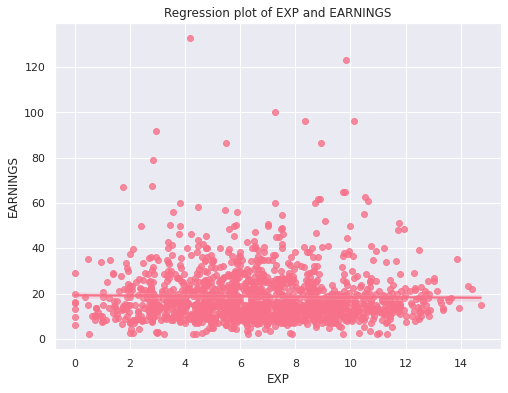

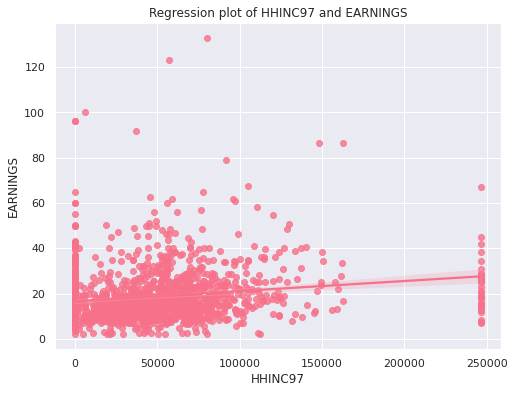

In [118]:
variables = ['S', 'EXP', 'HHINC97']

sns.set(rc = {'figure.figsize':(8,6)})
sns.set_palette("husl")

for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='EARNINGS', data=df_data).set(title=f'Regression plot of {var} and EARNINGS');

## Join Plot
---------------
Better visualize the relationship between 2 of the components of the Armed Services Vocational Aptitude Battery (AVASB) Test, the arithmetic reasoning (ASVABAR) and the mathematical knowledge (ASVABMK).

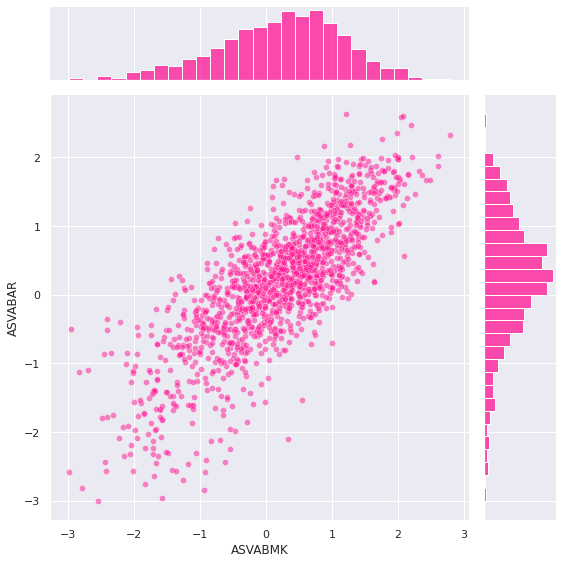

In [81]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['ASVABMK'], 
                y=df_data['ASVABAR'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

# Simple Linear Regression


## Split Training & Test Dataset

Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
y = df_data['EARNINGS'].values.reshape(-1, 1)
X = df_data['S'].values.reshape(-1, 1)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=10)

In [ ]:
# % of training set - Simple Linear Regression
train_pct = 100*len(X_train_l)/len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set - Simple Linear Regression
test_pct = 100*X_test_l.shape[0]/X.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


## Run Simple Regression
Using Years of Schooling (S) to predict the Hourly Earnings in 2011 (EARNINGS)

$$ EARNINGS = \theta _0 + \theta _1 S$$

In [82]:
regression_l = LinearRegression()

In [83]:
# Find the best-fit line
regression_l.fit(X_train_l, y_train_l)

# Theta 0 value
print(regression_l.intercept_)

# Theta 1 value
print(regression_l.coef_)

# R-squared
regression_l.score(X_train_l, y_train_l)

[1.02890741]
[[1.21917798]]


0.08085050566060015

Theta 0 means that if a the years of schooling is 0, the estimated earnings by hour is $1.03 

Theta 1 (or slope) tells us that for every extra year spent in school, the hourly rate of a person increases by $1.22. That means the longer we spend in school, the higher our hourly rate. 

We see that our r-squared comes in at around 0.08. This means that our model explains about 8% of the variance in earnings by hour, which is pretty low and our model is just not good.

## Evaluate the Coefficients of the Model

In [ ]:
earnings_l = regression_l.predict([[20]])
print(earnings_l)

[[25.41246705]]


In [ ]:
y_pred_l = regression_l.predict(X_test_l)
df_preds_l = pd.DataFrame({'Actual': y_test_l.squeeze(), 'Predicted': y_pred_l.squeeze()})
df_preds_l

,Actual,Predicted
0,18.18,24.19
1,12.00,21.75
2,15.12,19.32
3,20.16,22.97
4,15.00,10.78
...,...,...
293,17.51,15.66
294,23.00,16.88
295,20.63,20.54
296,15.00,20.54


## Evaluate the Model

In [ ]:
mae_l = mean_absolute_error(y_test_l, y_pred_l)
mse_l = mean_squared_error(y_test_l, y_pred_l)
rmse_l = np.sqrt(mse_l)

print(f'Mean absolute error: {mae_l:.2f}')
print(f'Mean squared error: {mse_l:.2f}')
print(f'Root mean squared error: {rmse_l:.2f}')

Mean absolute error: 7.38
Mean squared error: 133.49
Root mean squared error: 11.55


# Multivariable Regression

$$ EARNINGS = \theta _0 + \theta _1 S + \theta _2 EXP + \theta _3 HHINC97$$

## Split Training & Test Dataset


In [95]:
target = df_data['EARNINGS']
features = df_data[['S', 'EXP', 'HHINC97']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(features, 
                                                            target, 
                                                            test_size=0.2, 
                                                            random_state=10)

## Run Multivariable Regression

In [96]:
regression_m = LinearRegression()
regression_m.fit(X_train_m, y_train_m)

# Theta 0 value
print(regression_m.intercept_)

# Thetas 1, 2 and 3 values
print(regression_m.coef_)

# R-squared
# It means that the model explains about X% of the variance in movie revenue
regression_m.score(X_train_m, y_train_m)

-12.860841318537986
[1.64950395e+00 9.31359829e-01 2.97850584e-05]


0.12909883243415476

## Evaluate the Coefficients of the Model

In [97]:
feature_names = features.columns
model_coefficients = regression_m.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

         Coefficient value
S                 1.649504
EXP               0.931360
HHINC97           0.000030


## Make Predictions with the Model

In [98]:
y_pred_m = regression_m.predict(X_test_m)
results = pd.DataFrame({'Actual': y_test_m, 'Predicted': y_pred_m})
print(results)

      Actual  Predicted
1205   18.18  28.256841
957    12.00  20.457093
564    15.12  17.308680
1011   20.16  24.134900
577    15.00   9.736674
...      ...        ...
1200   17.51  16.452518
301    23.00  19.739226
855    20.63  20.701604
908    15.00  17.614914
78     20.00  17.221052

[298 rows x 2 columns]


## Evaluate the Model

In [99]:
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)

print(f'Mean absolute error: {mae_m:.2f}')
print(f'Mean squared error: {mse_m:.2f}')
print(f'Root mean squared error: {rmse_m:.2f}')

Mean absolute error: 7.17
Mean squared error: 132.49
Root mean squared error: 11.51


In [127]:
test_rsquared = regression_m.score(X_test_m, y_test_m)
print(f'Testing data r-squared: {test_rsquared:.2}')

train_rsquared = regression_m.score(X_train_m, y_train_m)
print(f'Training data r-squared: {train_rsquared:.2}')

Testing data r-squared: 0.08
Training data r-squared: 0.13


## Analyse the Estimated Values & Regression Residuals
How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. 

In [ ]:
predicted_values = regression_m.predict(X_train_m)
residuals = (y_train_m - predicted_values)

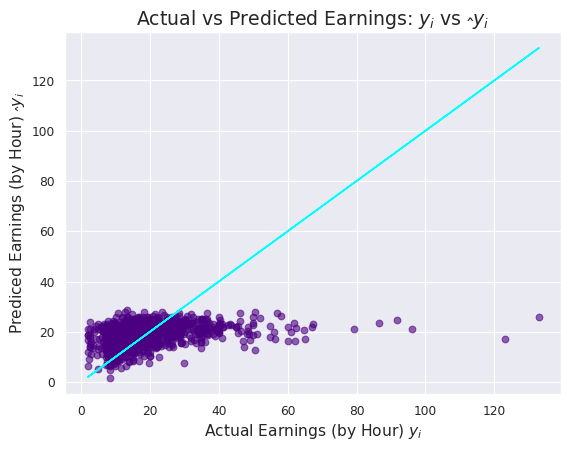

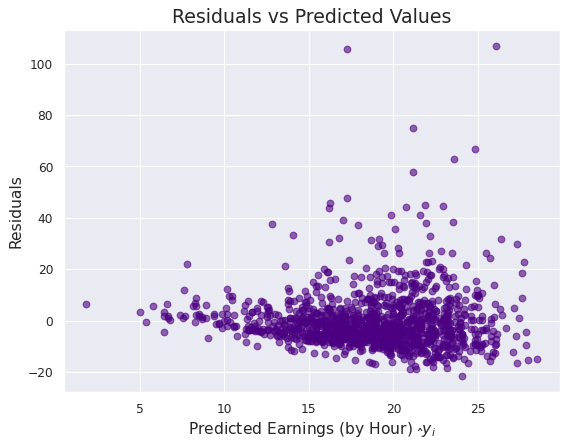

In [112]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=80)
plt.scatter(x=y_train_m, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train_m, y_train_m, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings (by Hour) $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings (by Hour) $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted Earnings
plt.figure(dpi=80)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Earnings', fontsize=17)
plt.xlabel('Predicted Earnings (by Hour) $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Experiment and Investigate Further

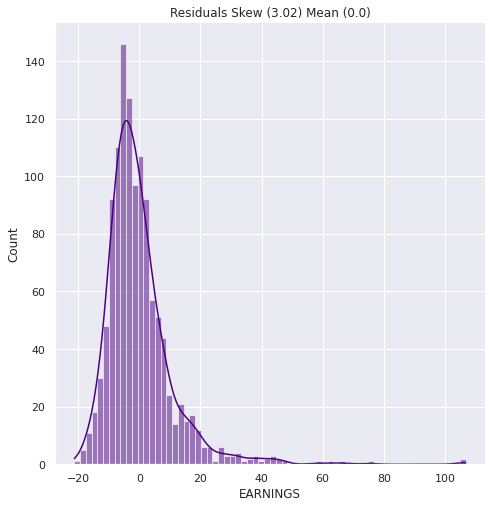

In [122]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo', height=7)
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

## Data Transformations for a Better Fit


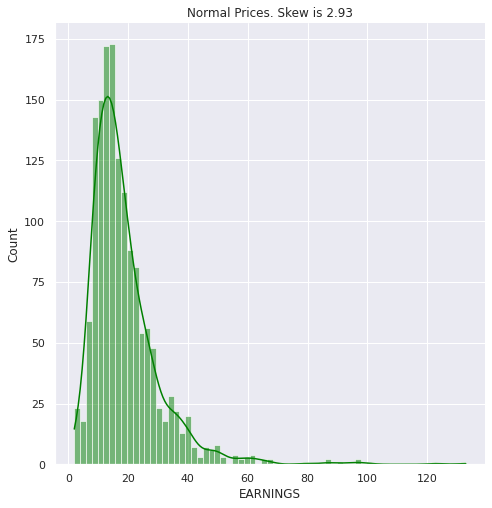

In [123]:
tgt_skew = df_data['EARNINGS'].skew()
sns.displot(df_data['EARNINGS'], kde='kde', color='green', height=7)
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

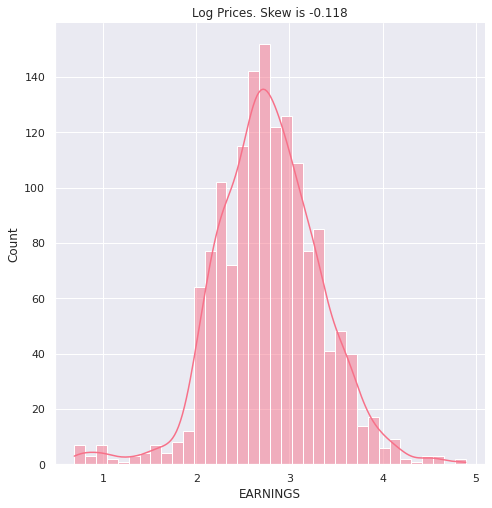

In [124]:
y_log = np.log(df_data['EARNINGS'])
sns.displot(y_log, kde=True, height=7)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

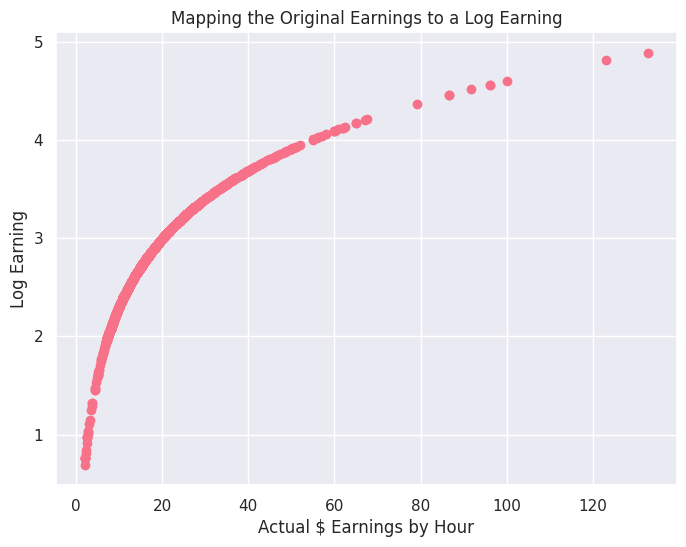

In [125]:
plt.figure(dpi=100)
plt.scatter(df_data['EARNINGS'], np.log(df_data['EARNINGS']))

plt.title('Mapping the Original Earnings to a Log Earning')
plt.ylabel('Log Earning')
plt.xlabel('Actual $ Earnings by Hour')
plt.show()

## Regression using Log Prices

In [126]:
new_target = np.log(df_data['EARNINGS']) # Use log prices
features = df_data[['S', 'EXP', 'HHINC97']]

X_train_log, X_test_log, log_y_train, log_y_test = train_test_split(features, 
                                                                    new_target, 
                                                                    test_size=0.2, 
                                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train_log, log_y_train)
log_rsquared = log_regr.score(X_train_log, log_y_train)

log_predictions = log_regr.predict(X_train_log)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.17
